In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

In [14]:
import zipfile

with zipfile.ZipFile('Plant Disease Dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('Plant Disease Dataset')

In [24]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32

train_dir = "/content/Plant Disease Dataset/PLD_3_Classes_256/Training"
test_dir = "/content/Plant Disease Dataset/PLD_3_Classes_256/Testing"
val_dir = "/content/Plant Disease Dataset/PLD_3_Classes_256/Validation"

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

test_generator = datagen.flow_from_directory(test_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

val_generator = datagen.flow_from_directory(val_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

Found 3251 images belonging to 3 classes.
Found 405 images belonging to 3 classes.
Found 416 images belonging to 3 classes.


In [27]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
#Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9644 - loss: 0.1157 - val_accuracy: 0.9423 - val_loss: 0.1760
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9533 - loss: 0.1217 - val_accuracy: 0.9038 - val_loss: 0.3961
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9637 - loss: 0.1026 - val_accuracy: 0.7933 - val_loss: 1.0864
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9570 - loss: 0.1447 - val_accuracy: 0.9207 - val_loss: 0.3396
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9586 - loss: 0.1296 - val_accuracy: 0.8438 - val_loss: 0.7909
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9595 - loss: 0.1468 - val_accuracy: 0.8942 - val_loss: 0.4164
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9583 - loss: 0.1439 - val_accuracy: 0.9351 - val_loss: 0.2051
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9685 - loss: 0.1072 - val_accu

In [31]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9543 - loss: 0.2337
Test Accuracy: 94.57%


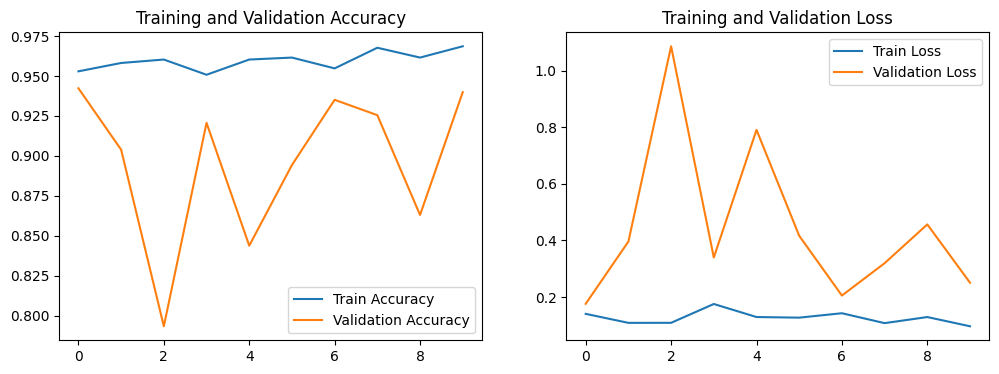

In [32]:
# Plot training accuracy and loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [33]:
model.save("crop_disease_model.h5")
print("Model saved successfully.")

Model saved successfully.


In [38]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model("/content/crop_disease_model.h5")

class_labels = ["Early Blight", "Healthy", "Late Blight"]

def predict_disease(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    print(prediction)
    predicted_class = np.argmax(prediction)
    print(predicted_class)

    print(f"Predicted Class: {class_labels[predicted_class]}")
    return class_labels[predicted_class]

image_path = "/content/Plant Disease Dataset/PLD_3_Classes_256/Validation/Late_Blight/Late_Blight_103.jpg"
predict_disease(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
[[6.2686130e-13 4.3293605e-11 1.0000000e+00]]
2
Predicted Class: Late Blight


'Late Blight'